In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [18]:
matches= pd.read_csv('matches.csv')
ipl_22= pd.read_csv('IPL_Ball_by_Ball_2022.csv')

In [14]:
matches.head(n=8)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,4/9/2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,4/9/2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,4/10/2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


In [19]:
ipl_22.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1304105,1,0,1,RD Gaikwad,DR Sams,DP Conway,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1304105,1,0,2,DP Conway,DR Sams,RD Gaikwad,NaN,0,0,0,0,1,DP Conway,lbw,NaN,Chennai Super Kings
2,1304105,1,0,3,MM Ali,DR Sams,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
3,1304105,1,0,4,MM Ali,DR Sams,RD Gaikwad,wides,0,1,1,0,0,NaN,NaN,NaN,Chennai Super Kings
4,1304105,1,0,5,MM Ali,DR Sams,RD Gaikwad,NaN,0,0,0,0,1,MM Ali,caught,HR Shokeen,Chennai Super Kings


In [20]:
matches.shape

(756, 18)

In [21]:
ipl_22.shape

(14233, 17)

In [22]:
matches.info

<bound method DataFrame.info of         id  season           city       date                        team1  \
0        1    2017      Hyderabad   4/5/2017          Sunrisers Hyderabad   
1        2    2017           Pune   4/6/2017               Mumbai Indians   
2        3    2017         Rajkot   4/7/2017                Gujarat Lions   
3        4    2017         Indore   4/8/2017       Rising Pune Supergiant   
4        5    2017      Bangalore   4/8/2017  Royal Challengers Bangalore   
..     ...     ...            ...        ...                          ...   
751  11347    2019         Mumbai   5/5/2019        Kolkata Knight Riders   
752  11412    2019        Chennai   7/5/2019          Chennai Super Kings   
753  11413    2019  Visakhapatnam   8/5/2019          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam  10/5/2019               Delhi Capitals   
755  11415    2019      Hyderabad  12/5/2019               Mumbai Indians   

                           team2           

In [23]:
ipl_22.info

<bound method DataFrame.info of             ID  innings  overs  ballnumber      batter    bowler non-striker  \
0      1304105        1      0           1  RD Gaikwad   DR Sams   DP Conway   
1      1304105        1      0           2   DP Conway   DR Sams  RD Gaikwad   
2      1304105        1      0           3      MM Ali   DR Sams  RD Gaikwad   
3      1304105        1      0           4      MM Ali   DR Sams  RD Gaikwad   
4      1304105        1      0           5      MM Ali   DR Sams  RD Gaikwad   
...        ...      ...    ...         ...         ...       ...         ...   
14228  1304047        2     17           5     SS Iyer  DJ Bravo  SP Jackson   
14229  1304047        2     17           6  SP Jackson  DJ Bravo     SS Iyer   
14230  1304047        2     18           1  SP Jackson  AF Milne     SS Iyer   
14231  1304047        2     18           2     SS Iyer  AF Milne  SP Jackson   
14232  1304047        2     18           3     SS Iyer  AF Milne  SP Jackson   

      e

In [25]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [26]:
ipl_22.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [27]:
#find null values
matches.isna().any()
#FALSE means no Nan value present in respective column  
#TRUE mean there are some NaN values in respective column 

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [118]:
matches.isna().sum()
#it gives the count of null value in each column

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [119]:
# Now we calculate the percentage of null value or missing value in each col
per_missingval = matches.isnull().sum()*100/len(matches)
per_missingval


id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [127]:
df_mis = pd.DataFrame({'Column': matches.columns,'Percent_Missing':per_missingval})
df_mis.sort_values('Percent_Missing',inplace = True)
df_mis

,Column,Percent_Missing
id,id,0.000000
venue,venue,0.000000
win_by_wickets,win_by_wickets,0.000000
win_by_runs,win_by_runs,0.000000
dl_applied,dl_applied,0.000000
toss_decision,toss_decision,0.000000
result,result,0.000000
team2,team2,0.000000
team1,team1,0.000000
date,date,0.000000


In [28]:
ipl_22.isna().any()

ID                   False
innings              False
overs                False
ballnumber           False
batter               False
bowler               False
non-striker          False
extra_type            True
batsman_run          False
extras_run           False
total_run            False
non_boundary         False
isWicketDelivery     False
player_out            True
kind                  True
fielders_involved     True
BattingTeam          False
dtype: bool

In [29]:
matches.describe()


,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


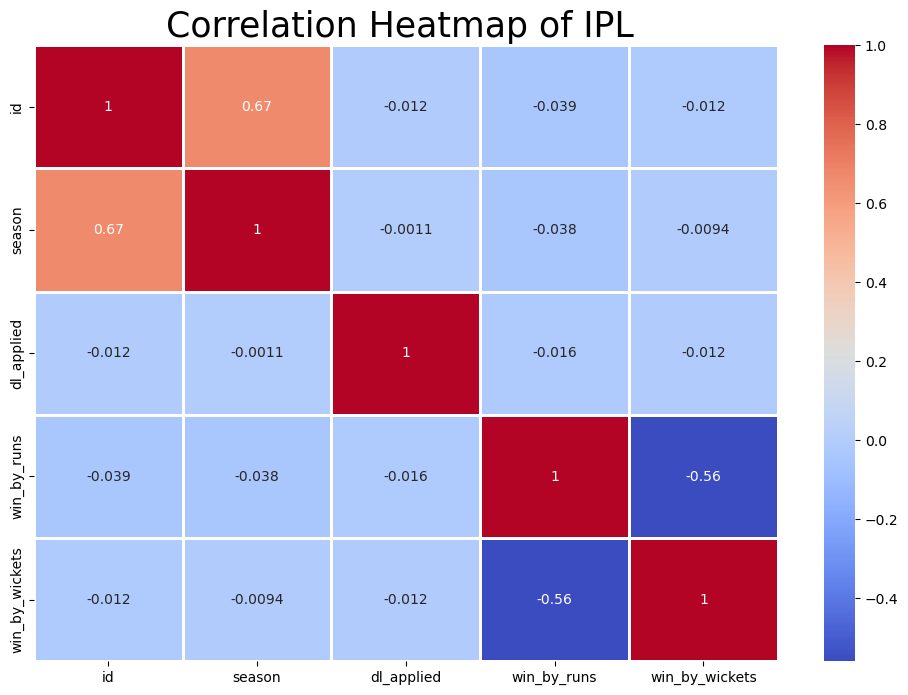

In [133]:
#Heat Map for IPL
# This plot is used to show the correlation between the varibles it uses the color
numerical_columns = matches.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = matches[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap of IPL ', fontsize=25)
plt.show()
#linewidth is line between two blocks
#annot mean the value inside the blocks

In [31]:
ipl_22.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,1.423300e+04,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000
mean,1.304076e+06,1.483665,9.260521,3.653341,1.287220,0.075248,1.362468,0.000211,0.051711
std,1.693847e+01,0.499751,5.685437,1.838467,1.701598,0.369625,1.687858,0.014517,0.221450
min,1.304047e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.304061e+06,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.304076e+06,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.304091e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.304105e+06,2.000000,19.000000,10.000000,6.000000,5.000000,7.000000,1.000000,1.000000


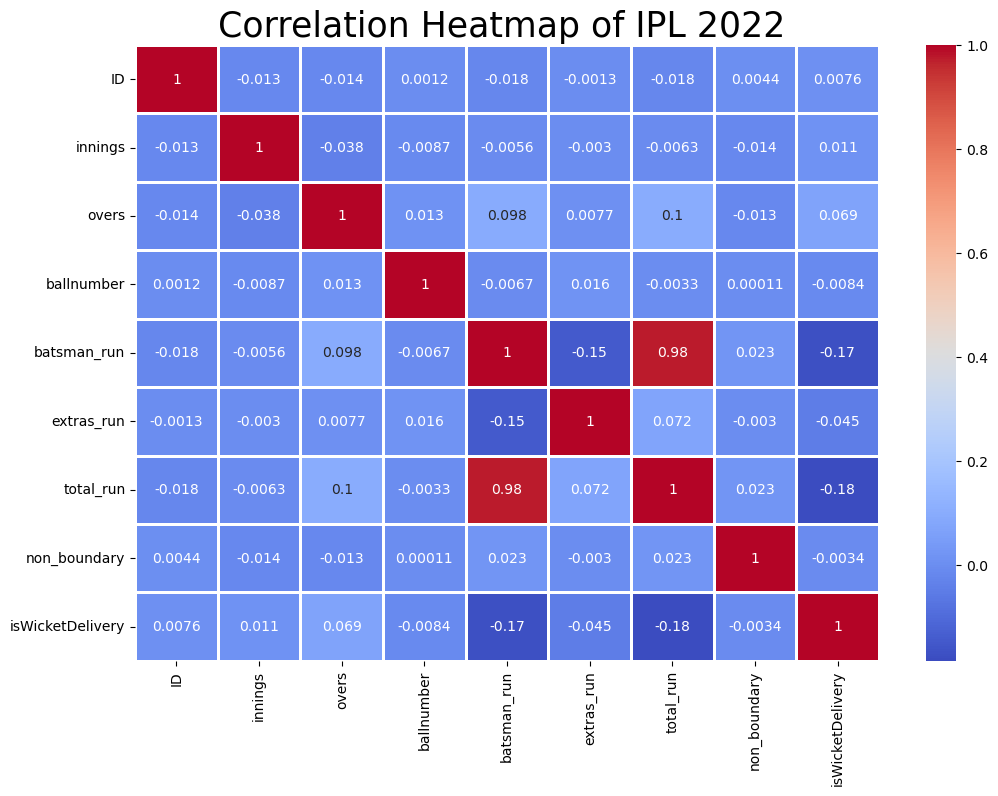

In [135]:
#Heat Map for IPL 2022 dataset
numerical_columns1 = ipl_22.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix1 = ipl_22[numerical_columns1].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap of IPL 2022 ', fontsize=25)
plt.show()

# Total matches 

In [32]:
matches['id'].count()

756

# How many IPL seasons are we using to analyse

In [36]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

# Total number of Season

In [48]:
len(matches['season'].unique())

12

# Total number of overs in IPL 2022 

In [34]:
ipl_22['overs'].count()

14233

 # Teams in IPL 2022

In [38]:
ipl_22['BattingTeam'].unique()

array(['Chennai Super Kings', 'Mumbai Indians', 'Rajasthan Royals',
       'Delhi Capitals', 'Gujarat Titans', 'Lucknow Super Giants',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Punjab Kings'], dtype=object)

# Greatest wins in IPL

In [54]:
 #In this we want to analyse the match in which a team won by maximum runs 
matches.iloc[matches['win_by_runs'].idxmax()]


id                               44
season                         2017
city                          Delhi
date                       5/6/2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [59]:
#Team name won win by maximum run
max_run_index = matches['win_by_runs'].idxmax()
winning_team = matches.loc[max_run_index, 'winner']
winning_team

'Mumbai Indians'

In [56]:
 #In this we want to analyse the match in which a won by maximum wickets
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                             4/7/2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [52]:
#By this we only return the name of the winning team
max_wicket_index = matches['win_by_wickets'].idxmax()
winning_team = matches.loc[max_wicket_index, 'winner']
winning_team


'Kolkata Knight Riders'

In [60]:
# In this we analyse the match in which a team won by minimum wicket
matches.iloc[matches['win_by_wickets'].idxmin()]


id                                                         1
season                                                  2017
city                                               Hyderabad
date                                                4/5/2017
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

# In Which season highest number of matches ever played 

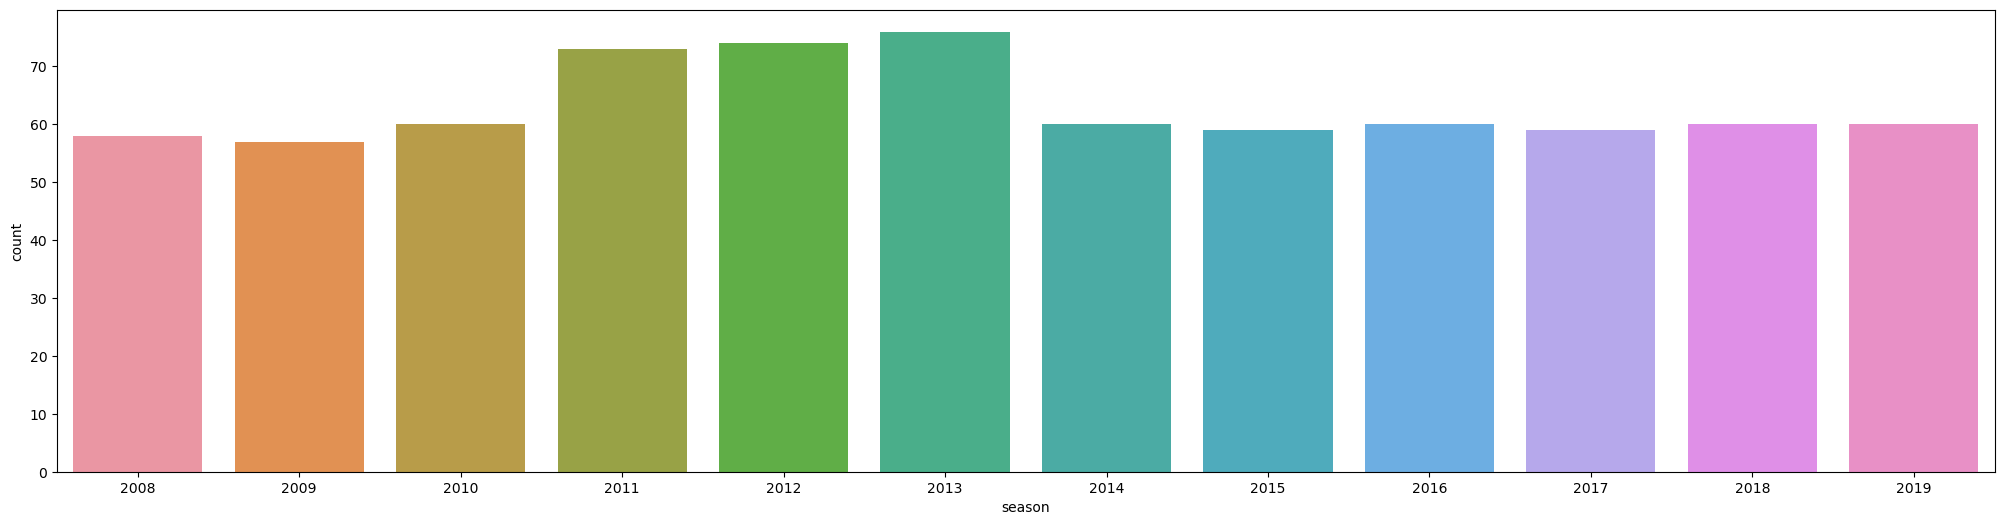

In [63]:
#Count Plot
#This plot compares the maximum values
# By the help of  countplot we can analyse or visualize the total number of matches in each season
fig_dims= (25,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='season',ax=ax,data = matches)
plt.show()
#fig_dims is the  size of the figure
#ax is used to set the axis

As we can see in this plot , in 2013 maximum number of matches  played

# Most succesful IPL team

<AxesSubplot:xlabel='winner'>

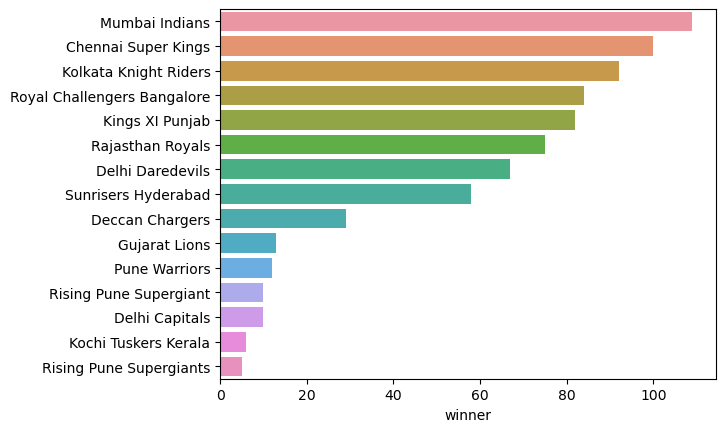

In [68]:
# Bar Plot 
# This plot is used to compare the value of differnt categories like team in this plot
data = matches.winner.value_counts()
sns.barplot(y=data.index,x = data )
# In this we only give the data in two axis

So the most succesful team is Mumbai Indians

# Toss is Important or not?

In [71]:
prob_of_win = matches['toss_winner'] == matches['winner']
prob_of_win.groupby(prob_of_win).size()
#In this we count the number of winner who win the toss or not win the toss
#True mean those teams who win the toss

False    363
True     393
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

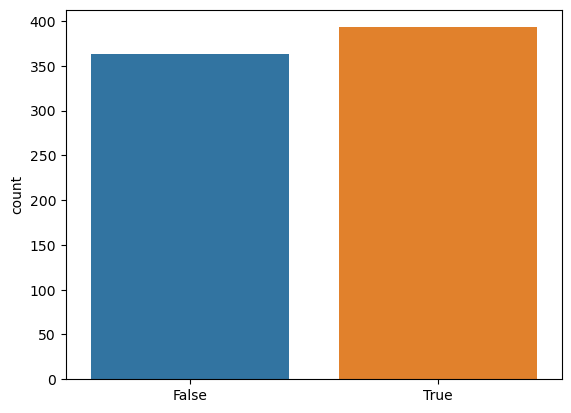

In [72]:
#we use countplot to visualize the probablity of winning after winning a toss
sns.countplot(prob_of_win)

By the analysis we can see that there is slightly differnce between the probabilty 

So toss is not too much important for winning

In [76]:
#Limit the no. of maximum rows and maximum column width 
pd.set_option('display.max_rows', 99999)
pd.set_option('display.max_colwidth', 400)

# Highest win by teams per season

In [79]:
df_win = matches.groupby('season')['winner'].value_counts()
df_win

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

By this we can analyse that how many matches any team won in any season 

In [88]:
df_win1=df_win.to_frame()
df_win1

winner
season winner                             
2008   Rajasthan Royals                 13
       Kings XI Punjab                  10
       Chennai Super Kings               9
       Delhi Daredevils                  7
       Mumbai Indians                    7
       Kolkata Knight Riders             6
       Royal Challengers Bangalore       4
       Deccan Chargers                   2
2009   Delhi Daredevils                 10
       Deccan Chargers                   9
       Royal Challengers Bangalore       9
       Chennai Super Kings               8
       Kings XI Punjab                   7
       Rajasthan Royals                  6
       Mumbai Indians                    5
       Kolkata Knight Riders             3
2010   Mumbai Indians                   11
       Chennai Super Kings               9
       Deccan Chargers                   8
       Royal Challengers Bangalore       8
       Delhi Daredevils                  7
       Kolkata Knight Riders             7
       Rajasthan Royals                  6
       Kings XI Punjab                   4
2011   Chennai Super Kings              11
       Mumbai Indians                   10
       Royal Challengers Bangalore      10
       Kolkata Knight Riders             8
       Kings XI Punjab                   7
       Deccan Chargers                   6
       Kochi Tuskers Kerala              6
       Rajasthan Royals                  6
       Delhi Daredevils                  4
       Pune Warriors                     4
2012   Kolkata Knight Riders            12
       Delhi Daredevils                 11
       Chennai Super Kings              10
       Mumbai Indians                   10
       Kings XI Punjab                   8
       Royal Challengers Bangalore       8
       Rajasthan Royals                  7
       Deccan Chargers                   4
       Pune Warriors                     4
2013   Mumbai Indians                   13
       Chennai Super Kings              12
       Rajasthan Royals                 11
       Sunrisers Hyderabad              10
       Royal Challengers Bangalore       9
       Kings XI Punjab                   8
       Kolkata Knight Riders             6
       Pune Warriors                     4
       Delhi Daredevils                  3
2014   Kings XI Punjab                  12
       Kolkata Knight Riders            11
       Chennai Super Kings              10
       Mumbai Indians                    7
       Rajasthan Royals                  7
       Sunrisers Hyderabad               6
       Royal Challengers Bangalore       5
       Delhi Daredevils                  2
2015   Chennai Super Kings              10
       Mumbai Indians                   10
       Royal Challengers Bangalore       8
       Kolkata Knight Riders             7
       Rajasthan Royals                  7
       Sunrisers Hyderabad               7
       Delhi Daredevils                  5
       Kings XI Punjab                   3
2016   Sunrisers Hyderabad              11
       Gujarat Lions                     9
       Royal Challengers Bangalore       9
       Kolkata Knight Riders             8
       Delhi Daredevils                  7
       Mumbai Indians                    7
       Rising Pune Supergiants           5
       Kings XI Punjab                   4
2017   Mumbai Indians                   12
       Rising Pune Supergiant           10
       Kolkata Knight Riders             9
       Sunrisers Hyderabad               8
       Kings XI Punjab                   7
       Delhi Daredevils                  6
       Gujarat Lions                     4
       Royal Challengers Bangalore       3
2018   Chennai Super Kings              11
       Sunrisers Hyderabad              10
       Kolkata Knight Riders             9
       Rajasthan Royals                  7
       Kings XI Punjab                   6
       Mumbai Indians                    6
       Royal Challengers Bangalore       6
       Delhi Daredevils              

In [203]:
df_win1.reset_index('season')


,season,winner
winner,,
Rajasthan Royals,2008,13
Kings XI Punjab,2008,10
Chennai Super Kings,2008,9
Delhi Daredevils,2008,7
Mumbai Indians,2008,7
Kolkata Knight Riders,2008,6
Royal Challengers Bangalore,2008,4
Deccan Chargers,2008,2
Delhi Daredevils,2009,10


# Analyses of toss decison

In [93]:

matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


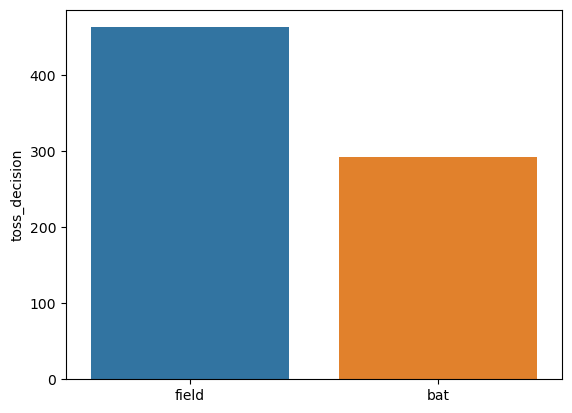

In [95]:
# we visualize the toss decision with the help of barplot 
sns.barplot(matches['toss_decision'].value_counts().index, matches['toss_decision'].value_counts())
plt.show()

By this plot we can analyse that after winning toss field is first priority

Text(0.5, 1.0, 'Decision taken by captain after winning toss')

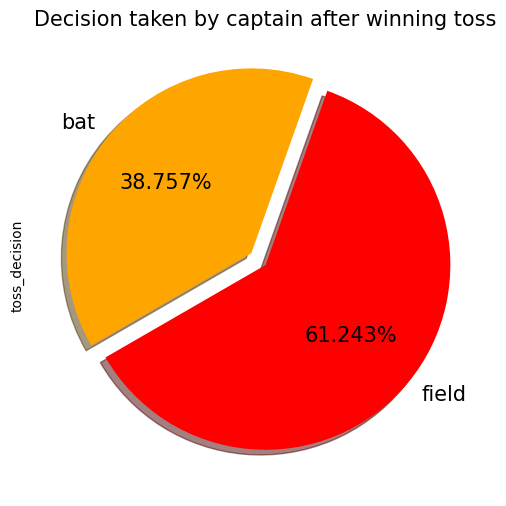

In [100]:
# Pie Chart
# Pie chart is kind of circle which compare the categories by dividing the area in it
#We can alse  visualize this with the help of pie chart
plt.figure(figsize=(10,6))
(matches['toss_decision'].value_counts()).plot(kind='pie',startangle=210,autopct = '%2.3f%%',shadow=4,explode=(0,0.1),colors=['r','orange'], fontsize=15)
plt.title('Decision taken by captain after winning toss', fontsize=15)
#startangle= Determines the starting angle of the pie chart
#autopct = Displays the percentage values on each portion of the pie chart 
#explode=explode is used to separate a wedge from the center.

# Man of the matches in IPL

In [101]:
matches['player_of_match'].value_counts()

CH Gayle             21
AB de Villiers       20
RG Sharma            17
MS Dhoni             17
DA Warner            17
YK Pathan            16
SR Watson            15
SK Raina             14
G Gambhir            13
MEK Hussey           12
AM Rahane            12
V Kohli              12
V Sehwag             11
DR Smith             11
AD Russell           11
A Mishra             11
JH Kallis            10
KA Pollard           10
SE Marsh              9
AT Rayudu             9
SP Narine             9
Harbhajan Singh       8
SR Tendulkar          8
RA Jadeja             8
UT Yadav              8
Rashid Khan           7
RV Uthappa            7
AC Gilchrist          7
M Vijay               6
RR Pant               6
S Dhawan              6
SL Malinga            6
A Nehra               6
BJ Hodge              6
HH Pandya             6
SC Ganguly            5
SPD Smith             5
PA Patel              5
KC Sangakkara         5
DPMD Jayawardene      5
BB McCullum           5
JP Faulkner     

Text(0, 0.5, 'Frequency')

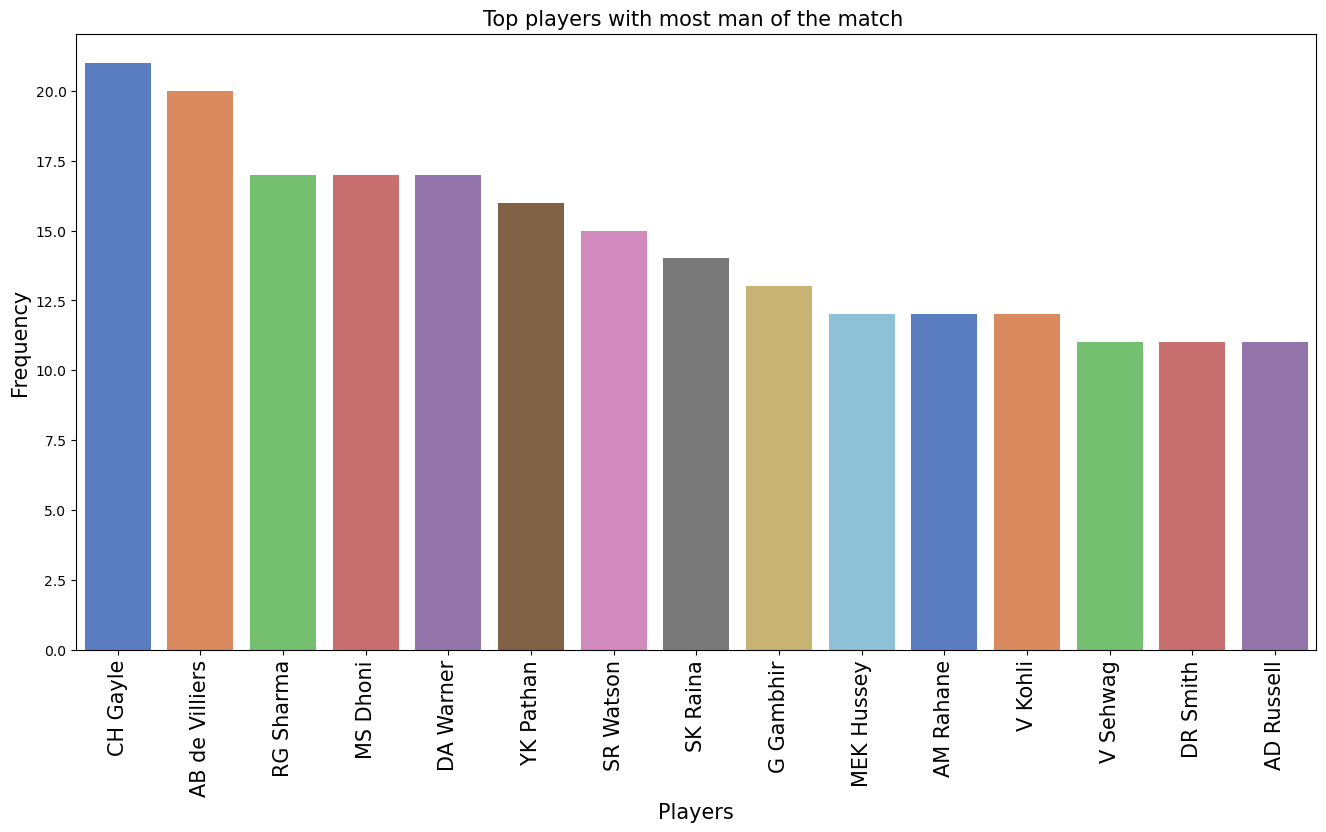

In [103]:
#Countplot of man of the matches
plt.figure(figsize=(16,8))
sns.countplot(x='player_of_match',data = matches,order=matches['player_of_match'].value_counts().head(15).index , palette='muted')
plt.title('Top players with most man of the match ', fontsize=15)
plt.xlabel('Players', fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel('Frequency', fontsize=15)
#pallete is used to give a color pattern

With this plot we can see the player names who have highest number of player of matches award

# Most use city as a venue

In [105]:
matches['city'].value_counts()
# it gives the count of matches palyed in each city

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

Text(0, 0.5, 'Frequency')

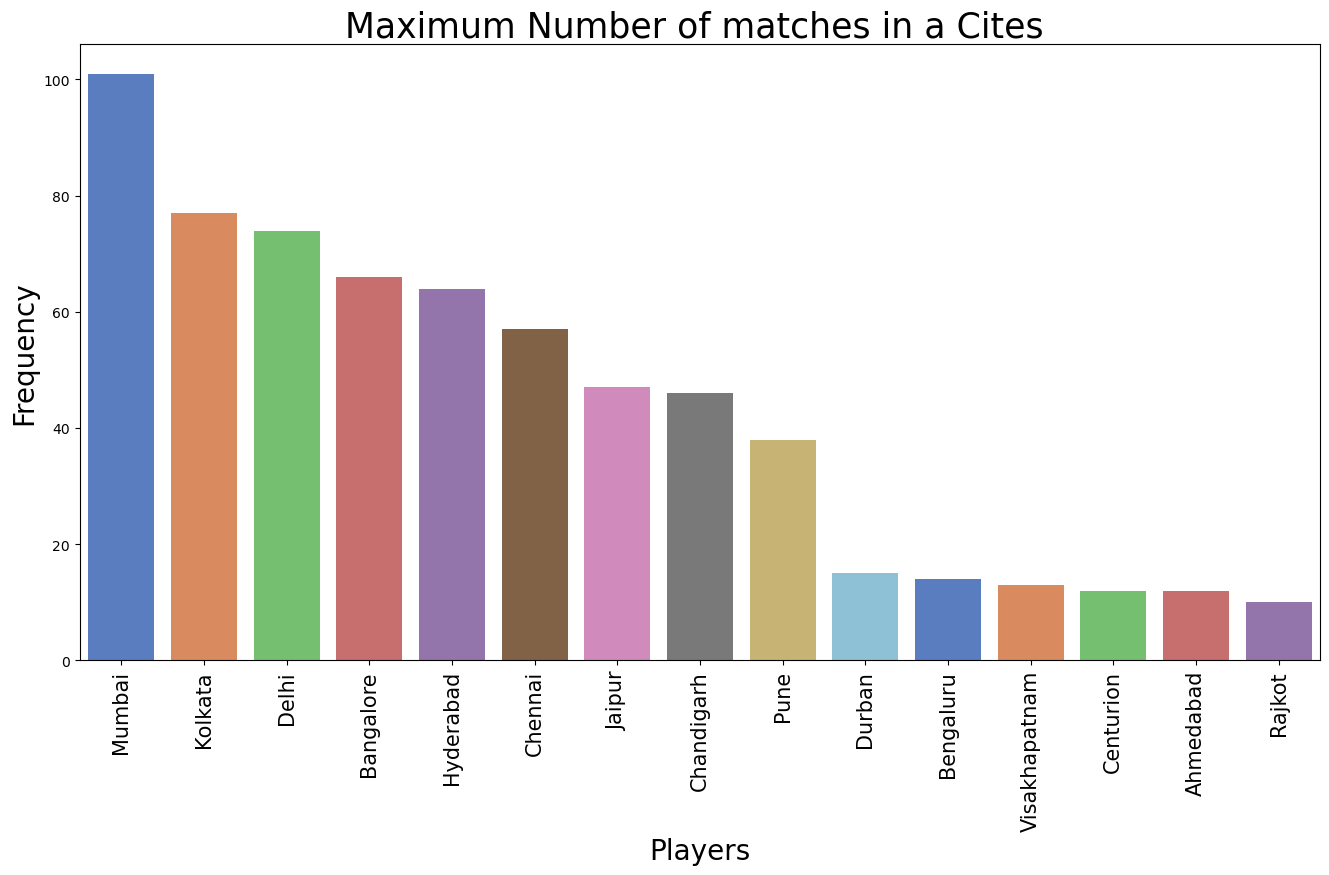

In [117]:
# Now we analayse the count value of matches in a city by visualization using countplot
plt.figure(figsize=(16,8))
sns.countplot(x='city',data = matches,order=matches['city'].value_counts().head(15).index , palette='muted')
plt.title('Maximum Number of matches in a Cites ', fontsize=25)
plt.xlabel('Players', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel('Frequency', fontsize=20)

By this plot we can anlyse the cities with most matches 
So mumbai have max maximum matches

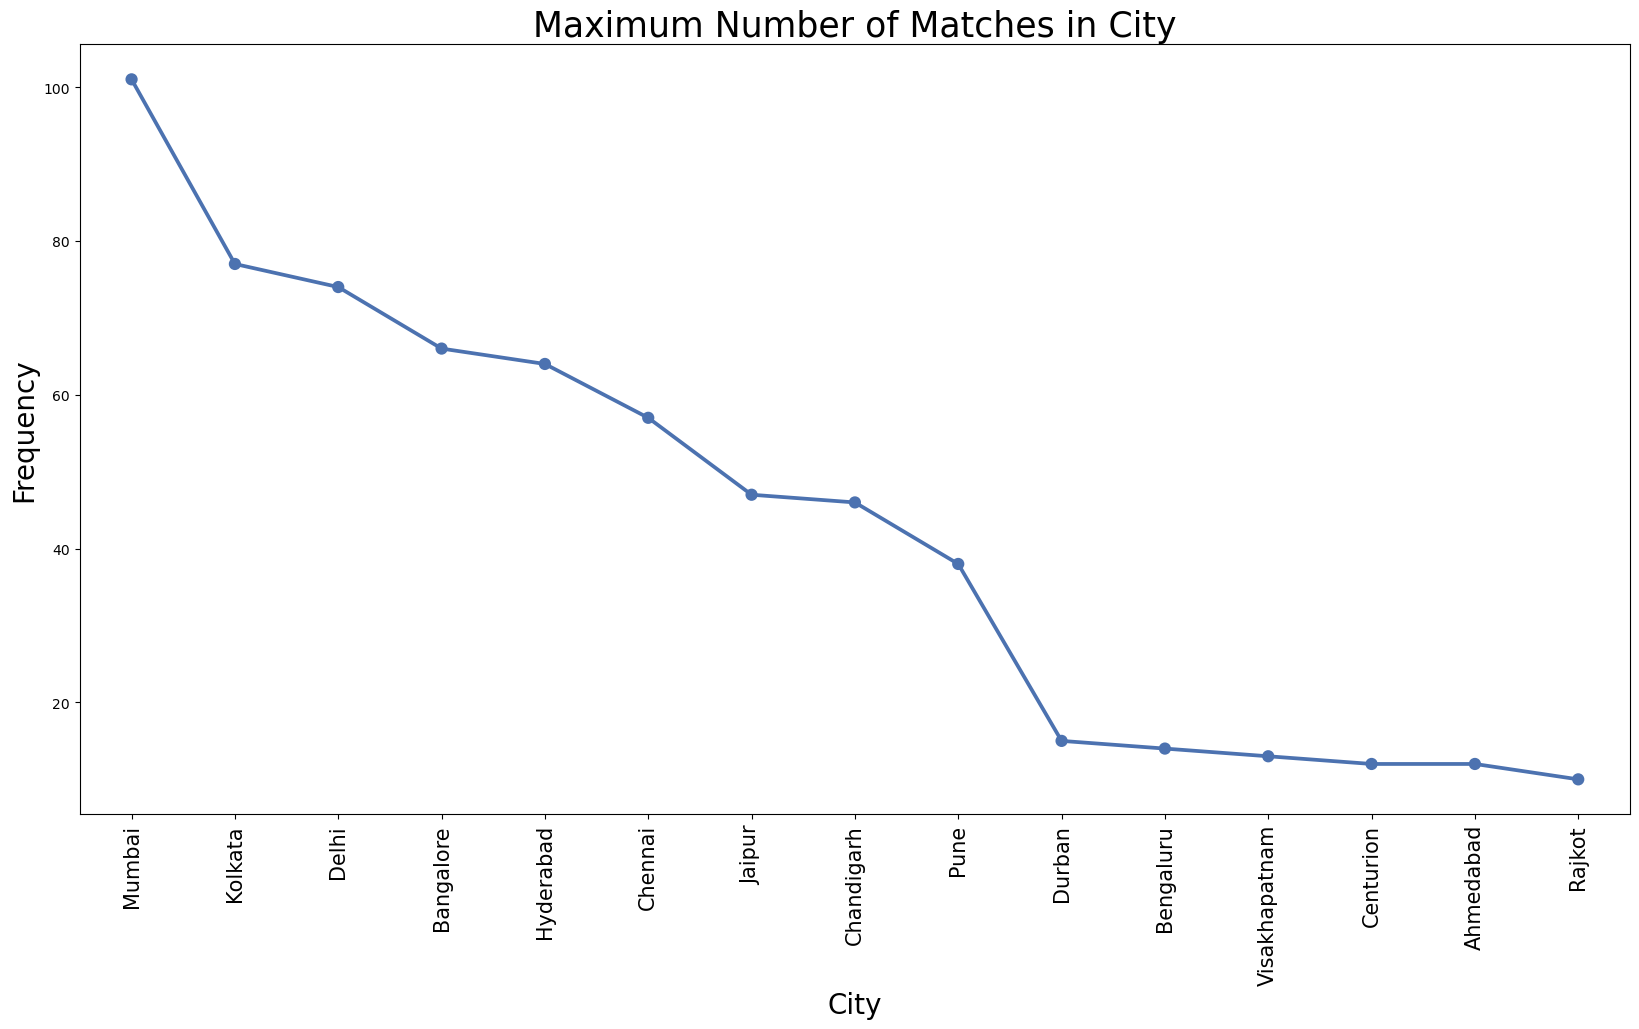

In [115]:
#Point plot 
# we use this plot to compare the value of different category like cities 
# it is a alternative of barplot and shows the values of different categories by points 
plt.figure(figsize=(20, 10))
sns.pointplot(x=matches['city'].value_counts().head(15).index, 
              y=matches['city'].value_counts().head(15).values, color=sns.color_palette('deep')[0])
plt.title('Maximum Number of Matches in City', fontsize=25)
plt.xlabel('City', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel('Frequency', fontsize=20)
plt.show()

# xtickks means label of each city at x index and rotation is used to turn these label or change the label into vertical
#color_pallate is used for give a color pattern 

# Now do some analysis on a particular team

In [193]:
ipl_22.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1304105,1,0,1,RD Gaikwad,DR Sams,DP Conway,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1304105,1,0,2,DP Conway,DR Sams,RD Gaikwad,NaN,0,0,0,0,1,DP Conway,lbw,NaN,Chennai Super Kings
2,1304105,1,0,3,MM Ali,DR Sams,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
3,1304105,1,0,4,MM Ali,DR Sams,RD Gaikwad,wides,0,1,1,0,0,NaN,NaN,NaN,Chennai Super Kings
4,1304105,1,0,5,MM Ali,DR Sams,RD Gaikwad,NaN,0,0,0,0,1,MM Ali,caught,HR Shokeen,Chennai Super Kings


# Analysing the team RCB 

In [194]:
df_rcb=ipl_22.loc[ipl_22['BattingTeam']=='Royal Challengers Bangalore']
df_rcb

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
1121,1304100,1,0,1,V Kohli,J Suchith,F du Plessis,NaN,0,0,0,0,1,V Kohli,caught,KS Williamson,Royal Challengers Bangalore
1122,1304100,1,0,2,RM Patidar,J Suchith,F du Plessis,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1123,1304100,1,0,3,RM Patidar,J Suchith,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1124,1304100,1,0,4,F du Plessis,J Suchith,RM Patidar,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1125,1304100,1,0,5,F du Plessis,J Suchith,RM Patidar,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1126,1304100,1,0,6,F du Plessis,J Suchith,RM Patidar,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1127,1304100,1,0,7,F du Plessis,J Suchith,RM Patidar,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1128,1304100,1,1,1,RM Patidar,B Kumar,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1129,1304100,1,1,2,RM Patidar,B Kumar,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1130,1304100,1,1,3,F du Plessis,B Kumar,RM Patidar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


 In this we only seprate the team with their batsman

In [174]:

ipl_sep =ipl_22.loc[ipl_22['BattingTeam']=='Royal Challengers Bangalore',['batter','batsman_run']]
ipl_sep

,batter,batsman_run
1121,V Kohli,0
1122,RM Patidar,0
1123,RM Patidar,1
1124,F du Plessis,0
1125,F du Plessis,0
1126,F du Plessis,0
1127,F du Plessis,0
1128,RM Patidar,0
1129,RM Patidar,1
1130,F du Plessis,1


In [176]:
sep_ind = ipl_sep.reset_index()
sep_ind

,index,batter,batsman_run
0,1121,V Kohli,0
1,1122,RM Patidar,0
2,1123,RM Patidar,1
3,1124,F du Plessis,0
4,1125,F du Plessis,0
5,1126,F du Plessis,0
6,1127,F du Plessis,0
7,1128,RM Patidar,0
8,1129,RM Patidar,1
9,1130,F du Plessis,1


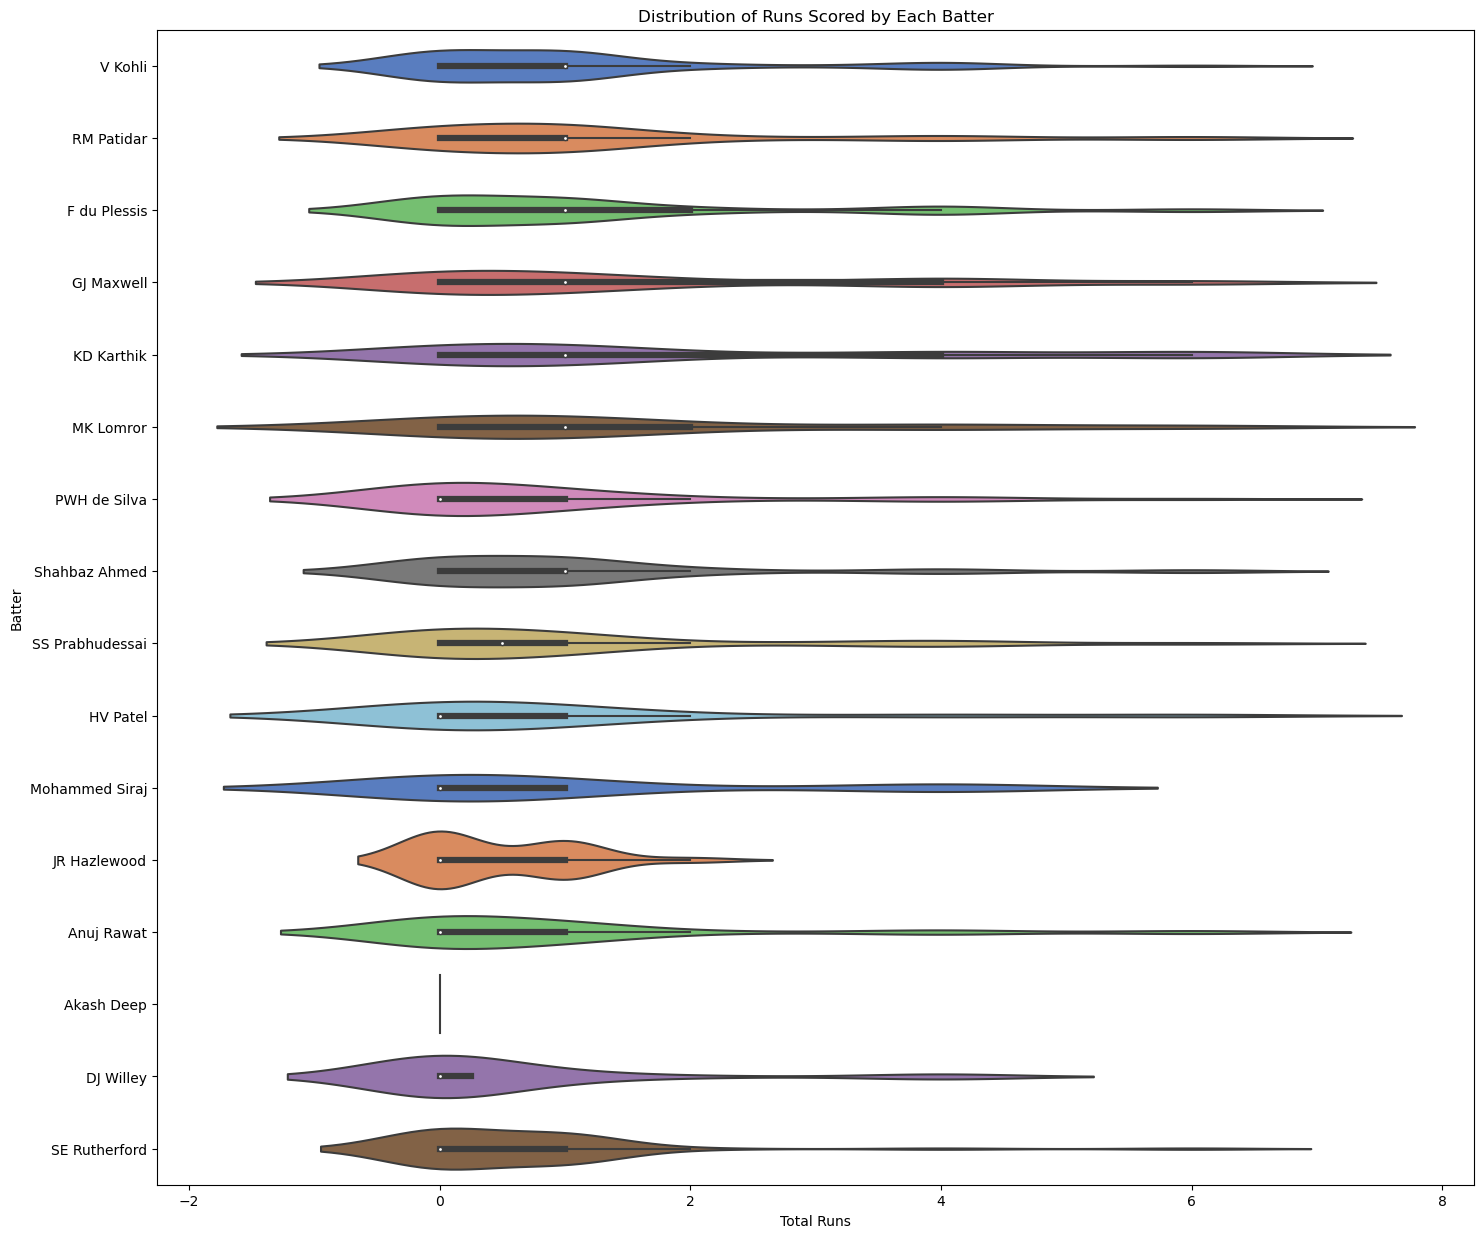

In [191]:
#ViolinPlot 
#The violinplot is a combination of box plots and KDE plots
#By this plot we can analyse the difference in catogaeries with help of whishker outliers and shape
plt.figure(figsize=(17, 15))
sns.violinplot(x='batsman_run', y='batter', data=sep_ind, palette='muted')
plt.title('Distribution of Runs Scored by Each Batter')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.show()

Ploty

In [190]:
#Scatter plot of ploty 
#This plot is more interactive we can hover on it 
fig = px.scatter(sep_ind, x='batsman_run', y='batter', color='batsman_run',
                 title='Distribution of Runs Scored by Each Batter',
                 )
fig.show()

In [171]:
#Now we group by the batter and count their runs
df_ipl = ipl_sep.groupby('batter').sum().sort_values(by='batsman_run',ascending=False)
df_ipl


,batsman_run
batter,
F du Plessis,389
KD Karthik,274
V Kohli,216
Shahbaz Ahmed,198
GJ Maxwell,193
RM Patidar,137
Anuj Rawat,129
SS Prabhudessai,67
MK Lomror,58


In [172]:
df_ipl.reset_index()
#this function set the index on a dataframe

,batter,batsman_run
0,F du Plessis,389
1,KD Karthik,274
2,V Kohli,216
3,Shahbaz Ahmed,198
4,GJ Maxwell,193
5,RM Patidar,137
6,Anuj Rawat,129
7,SS Prabhudessai,67
8,MK Lomror,58
9,PWH de Silva,37


In [154]:
df_ipl.iat[0,0]

389

In [163]:
#Now we have to select the top batsmen so we set a criteria 
df_bats = df_ipl[df_ipl>150].dropna().reset_index()
df_bats
#dropna is used to drop the row which have nan value

,batter,batsman_run
0,F du Plessis,389.0
1,KD Karthik,274.0
2,V Kohli,216.0
3,Shahbaz Ahmed,198.0
4,GJ Maxwell,193.0


<Figure size 1200x600 with 0 Axes>

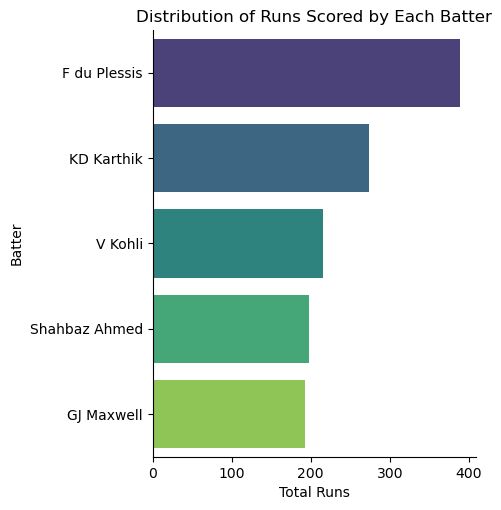

In [192]:
#In this we use a catplot stands for category plot with kind bar
#it is used to visualize the differnt category
plt.figure(figsize=(12, 6))
sns.catplot(data=df_bats,x='batsman_run', y='batter', kind='bar', palette='viridis')
plt.title('Distribution of Runs Scored by Each Batter')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.show()

In [208]:
#In this code we seprate the row which have some value in Extra_run
extra_runs1 = df_rcb[df_rcb['extra_type'].notnull()]
extra_runs1

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
1122,1304100,1,0,2,RM Patidar,J Suchith,F du Plessis,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1134,1304100,1,2,1,F du Plessis,J Suchith,RM Patidar,wides,0,2,2,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1158,1304100,1,5,6,F du Plessis,Kartik Tyagi,RM Patidar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1195,1304100,1,11,6,RM Patidar,Kartik Tyagi,F du Plessis,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1211,1304100,1,14,3,GJ Maxwell,Kartik Tyagi,F du Plessis,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1216,1304100,1,15,1,GJ Maxwell,B Kumar,F du Plessis,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
1234,1304100,1,18,1,GJ Maxwell,Kartik Tyagi,F du Plessis,noballs,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
2338,1304095,1,1,1,F du Plessis,Simarjeet Singh,V Kohli,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
2350,1304095,1,2,6,V Kohli,Mukesh Choudhary,F du Plessis,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
2382,1304095,1,8,1,V Kohli,RA Jadeja,GJ Maxwell,legbyes,0,4,4,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [214]:
extras = (extra_runs1['extra_type']).to_frame()
extras

,extra_type
1122,wides
1134,wides
1158,wides
1195,wides
1211,wides
1216,legbyes
1234,noballs
2338,wides
2350,wides
2382,legbyes


In [210]:
extra_counts = extra_runs1['extra_type'].value_counts()
extra_counts

wides      67
legbyes    26
noballs     6
byes        4
Name: extra_type, dtype: int64

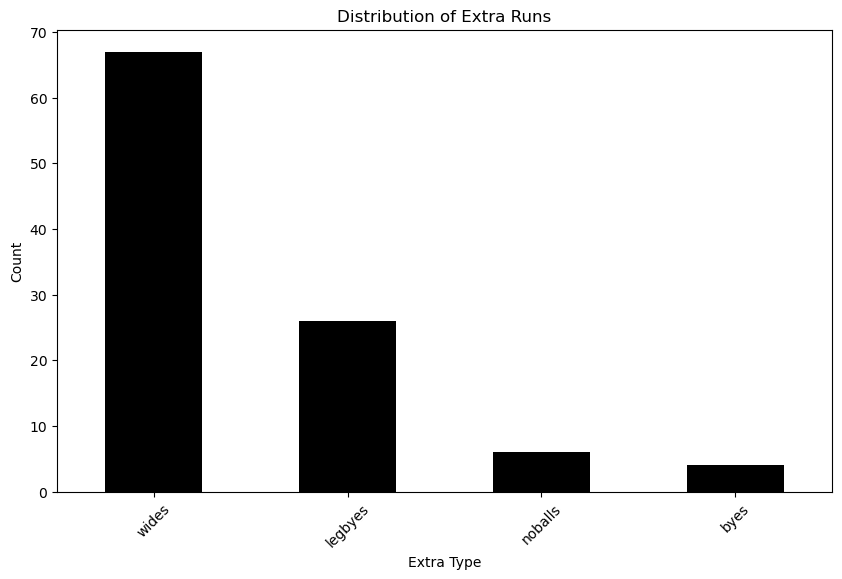

In [218]:
plt.figure(figsize=(10, 6))
extra_counts.plot(kind='bar', color='black')
plt.title('Distribution of Extra Runs')
plt.xlabel('Extra Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()